In [1]:
import numpy as np
from numpy import dtype
import netCDF4 as nc
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn
import scipy as scipy
from scipy import stats,signal
from scipy import interpolate
from scipy.interpolate import make_interp_spline
from datetime import date
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cftime
import csv
import os
import glob

In [11]:
%matplotlib widget

In [2]:
years = [1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
Jan = [4,1,3,5,2,7,1,4,2,1,5,6,9,6,7,5,2,3,4,8,1,0,7,2,0,0,0,0,2,3,3,5,5,6,2,7,6,9,8,8,4,1,2,0,1,6,6,4,4,2,4,2,8,5,0,3,5,7,3,4,3,4,5]
Feb = [8,7,7,2,1,4,6,3,3,3,3,10,4,4,8,10,6,3,3,2,5,5,2,6,4,3,7,4,1,2,8,5,7,2,3,2,3,2,12,4,6,2,1,3,1,2,3,5,7,5,0,4,6,4,2,1,6,8,4,4,6,2,2]
Mar = [9,15,9,14,11,8,7,10,8,2,10,11,17,13,10,15,15,14,7,12,13,11,14,18,10,9,10,10,8,8,6,13,12,9,4,5,7,5,9,7,12,5,6,6,2,8,8,10,9,9,5,12,10,4,3,1,12,12,7,6,8,12,14]
Apr = [19,19,8,13,22,20,19,16,14,15,16,12,18,21,21,17,18,12,14,14,18,17,16,13,17,14,11,4,14,7,11,18,8,14,17,10,11,5,13,14,12,12,10,14,10,11,17,11,14,13,7,19,13,9,11,14,10,17,7,13,13,9,13]
May = [22,20,21,18,15,25,18,23,22,19,16,21,24,23,27,27,20,26,24,20,24,22,26,23,18,18,18,19,17,22,24,23,14,13,13,24,21,17,18,21,18,17,14,19,23,12,14,14,17,16,17,17,14,12,10,21,18,19,13,24,17,16,20]
Jun = [25,22,26,19,21,24,23,26,24,27,22,26,22,23,23,28,24,26,21,17,29,25,28,25,20,16,20,19,17,25,22,20,22,24,21,16,14,16,24,17,13,18,11,12,18,20,14,13,15,20,21,17,14,14,25,16,10,15,15,16,8,11,14]
Jul = [17,21,22,19,21,23,23,21,16,25,21,25,25,25,14,20,23,25,26,19,21,21,21,21,14,13,17,22,17,11,14,11,17,20,19,14,20,17,11,18,16,13,9,16,16,11,8,7,14,15,14,10,6,12,11,13,13,13,14,12,14,11,11]
Aug = [19,11,19,16,20,16,18,14,20,18,17,19,20,19,23,17,11,20,19,16,24,17,11,17,10,23,17,11,16,9,10,12,14,15,11,3,6,6,7,11,7,7,10,10,13,11,9,13,8,8,11,9,5,6,4,6,10,16,10,11,16,15,4]
Sep = [11,16,9,11,9,17,10,9,13,9,17,14,14,19,11,13,8,17,4,12,13,9,9,5,9,10,12,7,11,8,6,6,10,9,5,2,10,4,12,7,9,11,8,5,14,9,7,9,8,2,3,7,5,3,9,5,6,7,12,11,4,7,3]
Oct = [8,5,7,6,4,4,6,7,6,7,12,10,5,11,8,6,4,4,3,8,7,10,2,5,11,7,6,1,5,5,7,5,7,7,6,8,6,10,10,4,7,7,8,4,8,3,7,7,3,6,5,7,7,5,9,2,3,8,9,8,3,13,4]
Nov = [6,7,3,7,7,6,3,5,11,3,4,7,3,10,6,7,0,7,3,6,0,3,5,9,5,6,7,5,13,7,4,5,10,3,6,4,6,5,3,2,9,7,5,6,9,8,6,1,3,1,8,4,0,2,3,8,3,2,7,2,6,3,4]
Dec = [1,5,2,0,5,2,3,11,9,7,7,8,5,11,4,8,0,5,9,1,0,1,13,12,2,1,1,3,4,1,6,0,7,3,1,4,5,3,1,4,1,5,9,1,4,3,5,3,6,4,3,2,7,2,4,9,4,3,7,5,4,11,5]
#Jan = [0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,0,0,1,0,3,0,0,0,1,2,0,0,0,3,0,0,2,0]
#Feb = [0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2,3,1,0,2,1,0,1,0,3,1,1,0,1,0]
#Mar = [0,5,0,1,0,1,0,1,0,0,0,0,0,2,0,1,6,1,0,0,0,1,0,0,1,0,2,0,0,0,1,4,0,0,1,0,1,2,1,1,0,0,0,0,1,0,2,2,2,1,0,1,2,0,0,0,1,4,1,1,2,3]
#Apr = [2,0,1,2,3,2,1,3,3,1,2,3,1,4,6,1,2,2,3,2,3,2,0,2,3,3,0,0,0,2,2,3,0,0,2,0,4,0,1,2,2,2,1,2,1,1,3,2,3,3,2,12,1,1,2,2,1,5,4,6,5,0]
#May = [5,2,5,1,3,6,2,1,2,0,0,5,2,7,2,1,2,3,2,1,3,5,4,7,3,2,2,0,1,5,3,0,1,2,0,5,2,1,3,2,1,1,1,9,5,0,0,2,7,3,3,3,0,5,1,5,3,2,1,9,0,3]
#Jun = [1,0,1,0,1,0,0,4,2,2,3,2,1,6,3,2,3,2,1,2,3,4,2,0,3,0,0,0,0,3,3,0,3,3,2,1,0,0,4,1,0,1,0,1,2,0,0,0,4,0,2,1,0,0,2,2,1,3,0,3,0,0]
#Jul = [0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,2,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1]
#Aug = [0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2,0]
#Sep = [0,0,0,0,0,1,0,2,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,4,2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0]
#Oct = [0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,4,0,0,1,0,0,1,0,1,1,0,0,2,2,0,0,1,2,1,0,3]
#Nov = [1,0,0,0,0,1,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,2,3,2,0,1,3,0,1,2,1,0,0,0,0,2,1,1,2,2,1,0,0,0,0,1,0,1,0,2,2,1,2,0,0,0]
#Dec = [0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,2,0,0,1,1,0,3]

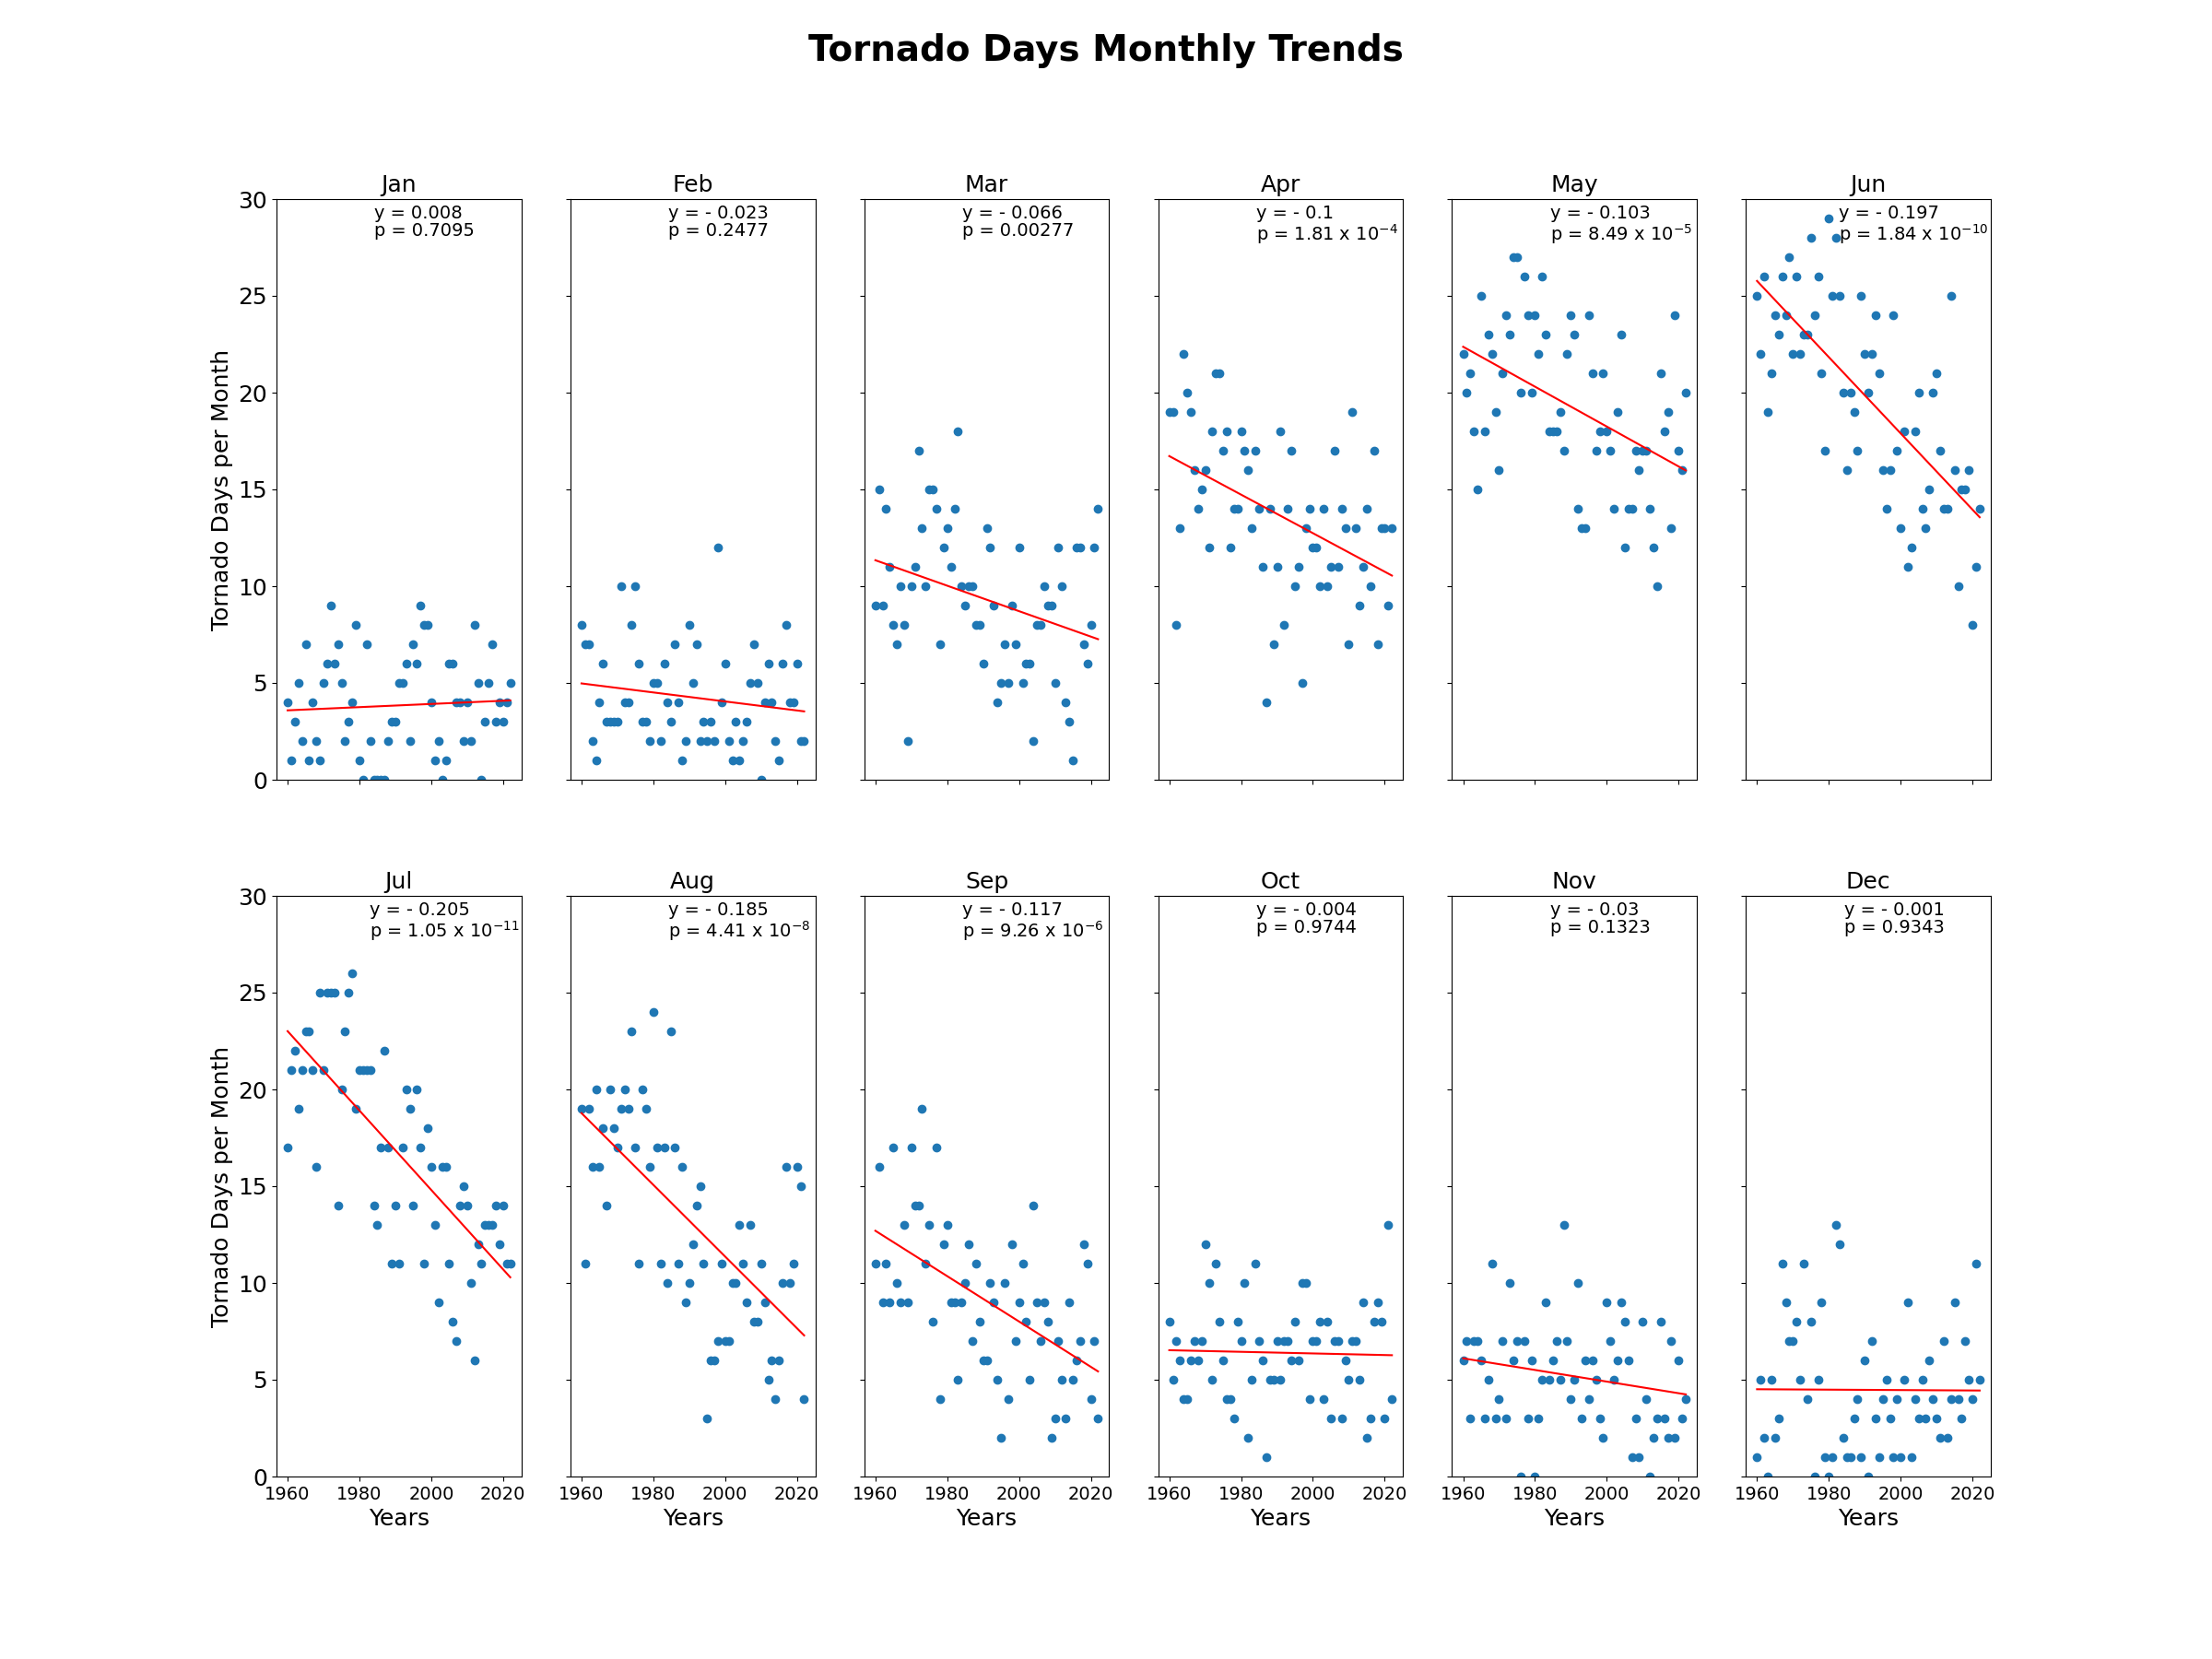

In [15]:
fig, axs = plt.subplots(2,6, figsize = (24,18))
fig.suptitle('Tornado Days Monthly Trends', fontsize=28, weight='bold')
axs[0,0].scatter(years,Jan)
axs[0,0].set_ylim(0,30)
#axs[0,0].tick_params(axis='x',labelsize='14')
axs[0,0].tick_params(axis='y',labelsize='18')
axs[0,0].set_xticklabels([])
axs[0,0].set_title('Jan', fontsize=18)
axs[0,0].set_ylabel('Tornado Days per Month', fontsize=18)
z1 = np.polyfit(years, Jan, 1)
p1 = np.poly1d(z1)
axs[0,0].plot(years,p1(years), color='r')
axs[0,0].text(.40, .99, 'y = 0.008', ha='left', va='top', size=14, transform=axs[0,0].transAxes)
axs[0,0].text(.40, .96, 'p = 0.7095', ha='left', va='top', size=14, transform=axs[0,0].transAxes)

axs[0,1].scatter(years,Feb)
axs[0,1].set_ylim(0,30)
#axs[0,1].tick_params(axis='x',labelsize='14')
#axs[0,1].tick_params(axis='y',labelsize='14')
axs[0,1].set_xticklabels([])
axs[0,1].set_yticklabels([])
axs[0,1].set_title('Feb', fontsize=18)
z2 = np.polyfit(years, Feb, 1)
p2 = np.poly1d(z2)
axs[0,1].plot(years,p2(years), color='r')
axs[0,1].text(.40, .99, 'y = - 0.023', ha='left', va='top', size=14, transform=axs[0,1].transAxes)
axs[0,1].text(.40, .96, 'p = 0.2477', ha='left', va='top', size=14, transform=axs[0,1].transAxes)

axs[0,2].scatter(years,Mar)
axs[0,2].set_ylim(0,30)
#axs[0,2].tick_params(axis='x',labelsize='14')
#axs[0,2].tick_params(axis='y',labelsize='14')
axs[0,2].set_xticklabels([])
axs[0,2].set_yticklabels([])
axs[0,2].set_title('Mar',fontsize=18)
z3 = np.polyfit(years, Mar, 1)
p3 = np.poly1d(z3)
axs[0,2].plot(years,p3(years), color='r')
axs[0,2].text(.40, .99, 'y = - 0.066', ha='left', va='top', size=14, transform=axs[0,2].transAxes)
axs[0,2].text(.40, .96, 'p = 0.00277', ha='left', va='top', size=14, transform=axs[0,2].transAxes)

axs[0,3].scatter(years,Apr)
axs[0,3].set_ylim(0,30)
#axs[0,3].tick_params(axis='x',labelsize='14')
#axs[0,3].tick_params(axis='y',labelsize='14')
axs[0,3].set_xticklabels([])
axs[0,3].set_yticklabels([])
axs[0,3].set_title('Apr',fontsize=18)
z4 = np.polyfit(years, Apr, 1)
p4 = np.poly1d(z4)
axs[0,3].plot(years,p4(years), color='r')
axs[0,3].text(.40, .99, 'y = - 0.1', ha='left', va='top', size=14, transform=axs[0,3].transAxes)
axs[0,3].text(.40, .96, 'p = 1.81 x $10^{-4}$', ha='left', va='top', size=14, transform=axs[0,3].transAxes)

axs[0,4].scatter(years,May)
axs[0,4].set_ylim(0,30)
#axs[0,4].tick_params(axis='x',labelsize='14')
#axs[0,4].tick_params(axis='y',labelsize='14')
axs[0,4].set_xticklabels([])
axs[0,4].set_yticklabels([])
axs[0,4].set_title('May', fontsize=18)
z5 = np.polyfit(years, May, 1)
p5 = np.poly1d(z5)
axs[0,4].plot(years,p5(years), color='r')
axs[0,4].text(.40, .99, 'y = - 0.103', ha='left', va='top', size=14, transform=axs[0,4].transAxes)
axs[0,4].text(.40, .96, 'p = 8.49 x $10^{-5}$', ha='left', va='top', size=14, transform=axs[0,4].transAxes)

axs[0,5].scatter(years,Jun)
axs[0,5].set_ylim(0,30)
#axs[0,5].tick_params(axis='x',labelsize='14')
#axs[0,5].tick_params(axis='y',labelsize='14')
axs[0,5].set_xticklabels([])
axs[0,5].set_yticklabels([])
axs[0,5].set_title('Jun', fontsize=18)
z6 = np.polyfit(years, Jun, 1)
p6 = np.poly1d(z6)
axs[0,5].plot(years,p6(years), color='r')
axs[0,5].text(.38, .99, 'y = - 0.197', ha='left', va='top', size=14, transform=axs[0,5].transAxes)
axs[0,5].text(.38, .96, 'p = 1.84 x $10^{-10}$', ha='left', va='top', size=14, transform=axs[0,5].transAxes)

axs[1,0].scatter(years,Jul)
axs[1,0].set_ylim(0,30)
axs[1,0].tick_params(axis='x',labelsize='14')
axs[1,0].tick_params(axis='y',labelsize='18')
axs[1,0].set_title('Jul',fontsize=18)
axs[1,0].set_xlabel('Years', fontsize=18)
axs[1,0].set_ylabel('Tornado Days per Month', fontsize=18)
z7 = np.polyfit(years, Jul, 1)
p7 = np.poly1d(z7)
axs[1,0].plot(years,p7(years), color='r')
axs[1,0].text(.38, .99, 'y = - 0.205', ha='left', va='top', size=14, transform=axs[1,0].transAxes)
axs[1,0].text(.38, .96, 'p = 1.05 x $10^{-11}$', ha='left', va='top', size=14, transform=axs[1,0].transAxes)

axs[1,1].scatter(years,Aug)
axs[1,1].set_ylim(0,30)
axs[1,1].tick_params(axis='x',labelsize='14')
#axs[1,1].tick_params(axis='y',labelsize='14')
axs[1,1].set_yticklabels([])
axs[1,1].set_title('Aug',fontsize=18)
axs[1,1].set_xlabel('Years', fontsize=18)
z8 = np.polyfit(years, Aug, 1)
p8 = np.poly1d(z8)
axs[1,1].plot(years,p8(years), color='r')
axs[1,1].text(.40, .99, 'y = - 0.185', ha='left', va='top', size=14, transform=axs[1,1].transAxes)
axs[1,1].text(.40, .96, 'p = 4.41 x $10^{-8}$', ha='left', va='top', size=14, transform=axs[1,1].transAxes)

axs[1,2].scatter(years,Sep)
axs[1,2].set_ylim(0,30)
axs[1,2].tick_params(axis='x',labelsize='14')
#axs[1,2].tick_params(axis='y',labelsize='14')
axs[1,2].set_yticklabels([])
axs[1,2].set_title('Sep',fontsize=18)
axs[1,2].set_xlabel('Years', fontsize=18)
z9 = np.polyfit(years, Sep, 1)
p9 = np.poly1d(z9)
axs[1,2].plot(years,p9(years), color='r')
axs[1,2].text(.40, .99, 'y = - 0.117', ha='left', va='top', size=14, transform=axs[1,2].transAxes)
axs[1,2].text(.40, .96, 'p = 9.26 x $10^{-6}$', ha='left', va='top', size=14, transform=axs[1,2].transAxes)

axs[1,3].scatter(years,Oct)
axs[1,3].set_ylim(0,30)
axs[1,3].tick_params(axis='x',labelsize='14')
#axs[1,3].tick_params(axis='y',labelsize='14')
axs[1,3].set_yticklabels([])
axs[1,3].set_title('Oct',fontsize=18)
axs[1,3].set_xlabel('Years', fontsize=18)
z10 = np.polyfit(years, Oct, 1)
p10 = np.poly1d(z10)
axs[1,3].plot(years,p10(years), color='r')
axs[1,3].text(.40, .99, 'y = - 0.004', ha='left', va='top', size=14, transform=axs[1,3].transAxes)
axs[1,3].text(.40, .96, 'p = 0.9744', ha='left', va='top', size=14, transform=axs[1,3].transAxes)

axs[1,4].scatter(years,Nov)
axs[1,4].set_ylim(0,30)
axs[1,4].tick_params(axis='x',labelsize='14')
#axs[1,4].tick_params(axis='y',labelsize='14')
axs[1,4].set_yticklabels([])
axs[1,4].set_title('Nov',fontsize=18)
axs[1,4].set_xlabel('Years', fontsize=18)
z11 = np.polyfit(years, Nov, 1)
p11 = np.poly1d(z11)
axs[1,4].plot(years,p11(years), color='r')
axs[1,4].text(.40, .99, 'y = - 0.03', ha='left', va='top', size=14, transform=axs[1,4].transAxes)
axs[1,4].text(.40, .96, 'p = 0.1323', ha='left', va='top', size=14, transform=axs[1,4].transAxes)

axs[1,5].scatter(years,Dec)
axs[1,5].set_ylim(0,30)
axs[1,5].tick_params(axis='x',labelsize='14')
#axs[1,5].tick_params(axis='y',labelsize='14')
axs[1,5].set_yticklabels([])
axs[1,5].set_title('Dec',fontsize=18)
axs[1,5].set_xlabel('Years', fontsize=18)
z12 = np.polyfit(years, Dec, 1)
p12 = np.poly1d(z12)
axs[1,5].plot(years,p12(years), color='r')
axs[1,5].text(.40, .99, 'y = - 0.001', ha='left', va='top', size=14, transform=axs[1,5].transAxes)
axs[1,5].text(.40, .96, 'p = 0.9343', ha='left', va='top', size=14, transform=axs[1,5].transAxes)

plt.show()
fig.savefig('tor_seasonality.png')

In [15]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(years,Nov)
print(slope)
print(p_value)

-0.030049923195084496
0.11557057602304001


In [15]:
np.sum(Dec)

282